## Derive daily water potential for each of the five sites across a Southern California Climate Gradient

By Bin Wang (@bioatmo_sphere) | wbwenwu@gmail.com

---

**Methods**: an approximate method--linearly scaling of $\psi$ with total precipitation--was applied

**Data Source**:

- Desert: [data acess page](https://wrcc.dri.edu/cgi-bin/rawMAIN.pl?caucde);[Station Site](https://deepcanyon.ucnrs.org/weather-data/)
- Scrubland:https://wrcc.dri.edu/cgi-bin/rawMAIN.pl?caucbu (Burns Pinon Ridge Reserve California);  ~~https://deepcanyon.ucnrs.org/weather-data/~~(`per Glassman et al. 2019 PNAS`);
- Grassland:
- Pine-Oak: https://wrcc.dri.edu/cgi-bin/rawMAIN.pl?caucja (Jame Reserve, California)
- Subalpine: https://raws.dri.edu/cgi-bin/rawMAIN.pl?caCMSJ(Mt. San Jacinto California); State Park:https://www.parks.ca.gov/?page_id=636)

**NOTE**: data in Glassman et al. (2019)([link](https://github.com/stevenallison/UCIClimateExperiment/blob/master/Precipitation.R)) are field transplanting-focused, which used data of limited, specific years. Instead, this simulation project, in theory, should use climate data of broader ranges, though in practice, with data availability and accessibiliyt limititations, those field experimentation-based data could be used.

In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import pandas as pd
import numpy  as np
import matplotlib
import matplotlib.pyplot as plt

print("Numpy version:", np.__version__)
print("Pandas version:",pd.__version__)
print("Matplotlib version:",matplotlib.__version__)

Numpy version: 1.18.2
Pandas version: 0.25.3
Matplotlib version: 3.1.3


## `Desert`

In [2]:
desert_precip = pd.read_csv("precipitation/Boyd_Deep_Canyon_Daily_Precipitation.csv")
desert_precip.head()

,Date,Year,Day of Year,Day of Run,Total Precipitation
0,1/1/11,2011,1,1,0.00
1,1/2/11,2011,2,2,0.00
2,1/3/11,2011,3,3,0.01
3,1/4/11,2011,4,4,0.00
4,1/5/11,2011,5,5,0.00


In [3]:
desert_precip.tail()

,Date,Year,Day of Year,Day of Run,Total Precipitation
3282,12/27/19,2019,361,3283,0.00
3283,12/28/19,2019,362,3284,0.00
3284,12/29/19,2019,363,3285,0.00
3285,12/30/19,2019,364,3286,0.04
3286,12/31/19,2019,365,3287,0.00


In [4]:
desert_precip.isnull().values.any()

False

In [5]:
desert_precip[desert_precip['Total Precipitation'] < 0.0]

,Date,Year,Day of Year,Day of Run,Total Precipitation
2763,7/26/18,2018,207,2764,-9999.0
2764,7/27/18,2018,208,2765,-9999.0


In [6]:
desert_precip_cor = desert_precip.copy()

In [7]:
desert_precip_cor['Total Precipitation'].loc[desert_precip['Total Precipitation'] < 0.0] = 0.0

/Users/Ben/DEMENTpy/dement_env/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [8]:
desert_precip_cor.head()

,Date,Year,Day of Year,Day of Run,Total Precipitation
0,1/1/11,2011,1,1,0.00
1,1/2/11,2011,2,2,0.00
2,1/3/11,2011,3,3,0.01
3,1/4/11,2011,4,4,0.00
4,1/5/11,2011,5,5,0.00


**Two leap years, 2012 and 2016, within this range**

In [9]:
desert_precip_2012 = desert_precip_cor[desert_precip_cor['Year']==2012]
desert_precip_2012.head()

,Date,Year,Day of Year,Day of Run,Total Precipitation
365,1/1/12,2012,1,366,0.0
366,1/2/12,2012,2,367,0.0
367,1/3/12,2012,3,368,0.0
368,1/4/12,2012,4,369,0.0
369,1/5/12,2012,5,370,0.0


In [10]:
desert_precip_2012.shape

(366, 5)

In [11]:
desert_precip_2016 = desert_precip_cor[desert_precip_cor['Year']==2016]
desert_precip_2016.head()

,Date,Year,Day of Year,Day of Run,Total Precipitation
1826,1/1/16,2016,1,1827,0.0
1827,1/2/16,2016,2,1828,0.0
1828,1/3/16,2016,3,1829,0.0
1829,1/4/16,2016,4,1830,0.0
1830,1/5/16,2016,5,1831,0.8


In [12]:
desert_precip_2016.shape

(366, 5)

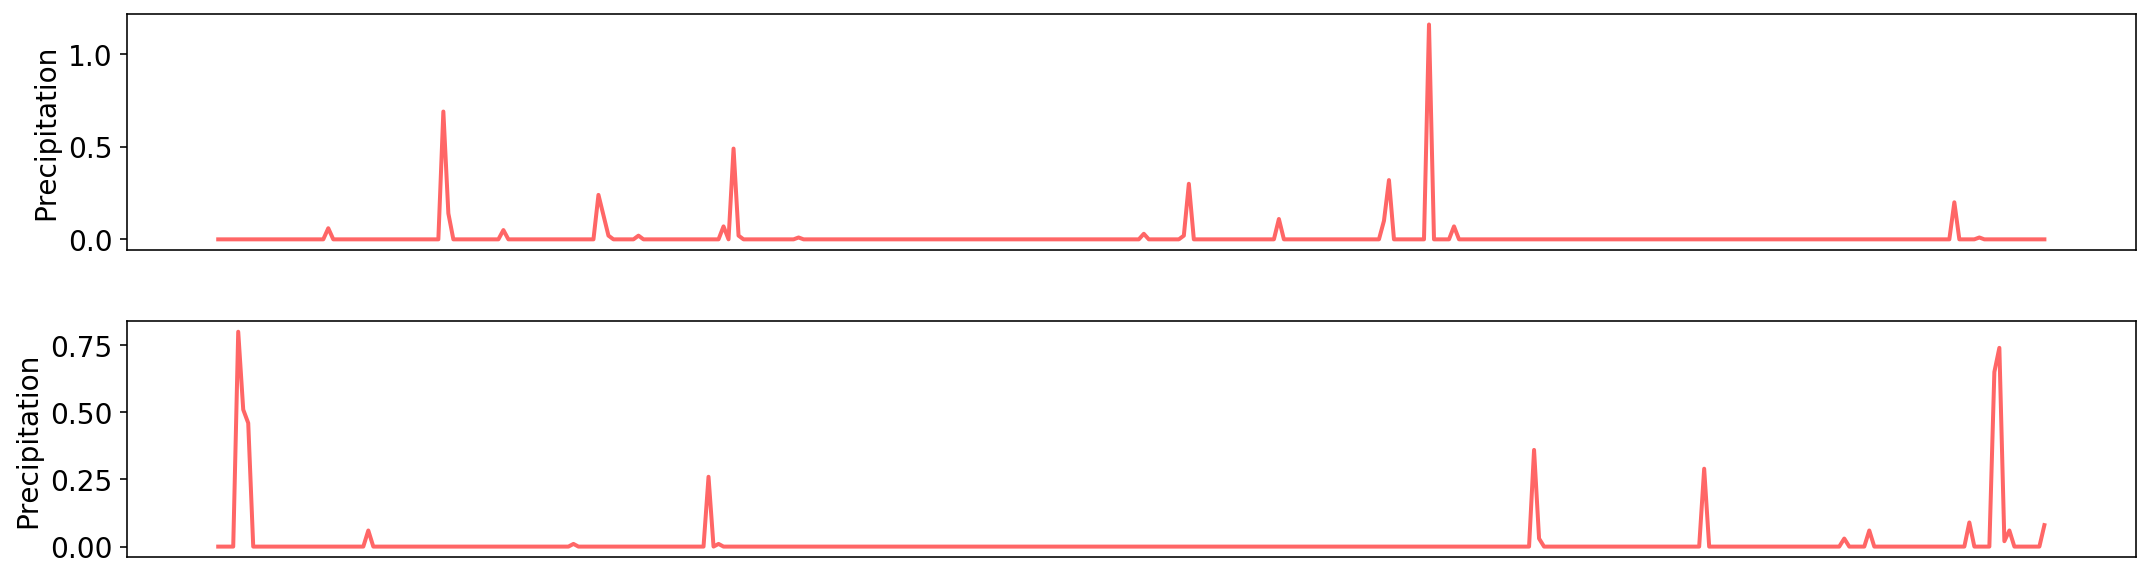

In [13]:
fig, (ax1,ax2) = plt.subplots(2, 1,figsize=(18,5))

ax1.plot(desert_precip_2012['Total Precipitation'],color='red',linewidth=2,alpha=0.6)
#ax1.plot(base['Psi'],color='blue',linewidth=2)

ax1.set_ylabel('Precipitation',size=14)
#ax1.set_xlim(-10,365*year+10)
ax1.tick_params(bottom=False,labelbottom=False,labelsize=14)    


ax2.plot(desert_precip_2016['Total Precipitation'],color='red',linewidth=2,alpha=0.6)    
#ax2.plot(base['Temp'],color='blue',linewidth=2)

ax2.set_ylabel('Precipitation',size=14)
#ax2.set_xlim(-10,365*year+10)
ax2.tick_params(bottom=False,labelbottom=False, labelsize=14)    

#for i in range(year-1):
#    ax2.axvline(x=365*(i+1)-1, color='k',linestyle=':',lw=2)
    
plt.subplots_adjust(hspace=0.3)

plt.show()

In [14]:
desert_precip_comb = \
pd.concat([desert_precip_cor[desert_precip['Year']==2011]['Total Precipitation'].reset_index(drop=True),
           desert_precip_cor[desert_precip['Year']==2013]['Total Precipitation'].reset_index(drop=True),
           desert_precip_cor[desert_precip['Year']==2014]['Total Precipitation'].reset_index(drop=True),
           desert_precip_cor[desert_precip['Year']==2015]['Total Precipitation'].reset_index(drop=True),
           desert_precip_cor[desert_precip['Year']==2017]['Total Precipitation'].reset_index(drop=True),
           desert_precip_cor[desert_precip['Year']==2018]['Total Precipitation'].reset_index(drop=True),
           desert_precip_cor[desert_precip['Year']==2019]['Total Precipitation'].reset_index(drop=True)
          ],axis=1,ignore_index=True,sort=False)
desert_precip_comb

,0,1,2,3,4,5,6
0,0.00,0.0,0.00,0.0,0.0,0.00,0.00
1,0.00,0.0,0.00,0.0,0.0,0.00,0.00
2,0.01,0.0,0.00,0.0,0.0,0.00,0.00
3,0.00,0.0,0.00,0.0,0.0,0.00,0.00
4,0.00,0.0,0.00,0.0,0.0,0.00,0.00
...,...,...,...,...,...,...,...
360,0.00,0.0,0.00,0.0,0.0,0.00,0.00
361,0.00,0.0,0.00,0.0,0.0,0.00,0.00
362,0.00,0.0,0.00,0.0,0.0,0.00,0.00
363,0.00,0.0,0.16,0.0,0.0,0.00,0.04


In [15]:
desert_precip_daily_mean = desert_precip_comb.mean(axis=1)
desert_precip_daily_mean

0      0.000000
1      0.000000
2      0.001429
3      0.000000
4      0.000000
         ...   
360    0.000000
361    0.000000
362    0.000000
363    0.028571
364    0.017143
Length: 365, dtype: float64

In [16]:
sum(desert_precip_daily_mean)

4.339999999999998

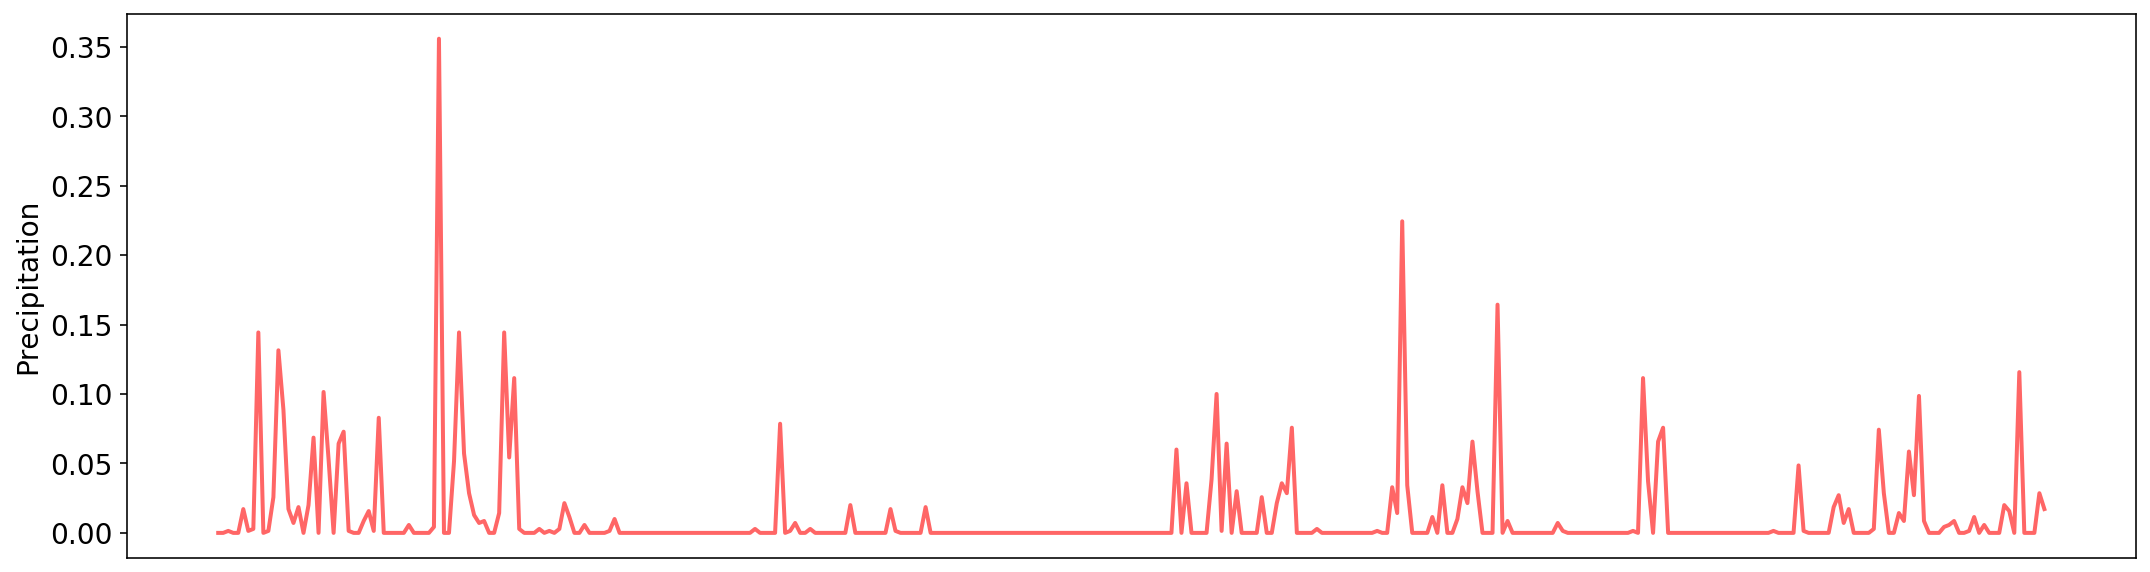

In [17]:
fig, ax1 = plt.subplots(1, 1,figsize=(18,5))

ax1.plot(desert_precip_daily_mean,color='red',linewidth=2,alpha=0.6)

ax1.set_ylabel('Precipitation',size=14)
ax1.tick_params(bottom=False,labelbottom=False,labelsize=14)    


plt.show()

## `Scrubland`

In [18]:
scrubland_precip = pd.read_csv("precipitation/Burns_Pinyon_Ridge_Reserve_Daily_Precipitation.csv")
scrubland_precip.head()

,Date,Year,Day of Year,Day of Run,Total Precipitation
0,1/1/11,2011,1,1,0.00
1,1/2/11,2011,2,2,0.00
2,1/3/11,2011,3,3,0.03
3,1/4/11,2011,4,4,0.00
4,1/5/11,2011,5,5,0.00


In [19]:
scrubland_precip.tail()

,Date,Year,Day of Year,Day of Run,Total Precipitation
3282,12/27/19,2019,361,3283,0.70
3283,12/28/19,2019,362,3284,0.00
3284,12/29/19,2019,363,3285,0.00
3285,12/30/19,2019,364,3286,0.07
3286,12/31/19,2019,365,3287,0.01


In [20]:
scrubland_precip.isnull().values.any()

False

In [21]:
scrubland_precip[scrubland_precip['Total Precipitation'] < 0.0]

,Date,Year,Day of Year,Day of Run,Total Precipitation


In [22]:
scrubland_precip_comb = \
pd.concat([scrubland_precip[scrubland_precip['Year']==2011]['Total Precipitation'].reset_index(drop=True),
           scrubland_precip[scrubland_precip['Year']==2013]['Total Precipitation'].reset_index(drop=True),
           scrubland_precip[scrubland_precip['Year']==2014]['Total Precipitation'].reset_index(drop=True),
           scrubland_precip[scrubland_precip['Year']==2015]['Total Precipitation'].reset_index(drop=True),
           scrubland_precip[scrubland_precip['Year']==2017]['Total Precipitation'].reset_index(drop=True),
           scrubland_precip[scrubland_precip['Year']==2018]['Total Precipitation'].reset_index(drop=True),
           scrubland_precip[scrubland_precip['Year']==2019]['Total Precipitation'].reset_index(drop=True)
          ],axis=1,ignore_index=True,sort=False)
scrubland_precip_comb

,0,1,2,3,4,5,6
0,0.00,0.0,0.00,0.0,0.0,0.0,0.00
1,0.00,0.0,0.00,0.0,0.0,0.0,0.00
2,0.03,0.0,0.00,0.0,0.0,0.0,0.00
3,0.00,0.0,0.00,0.0,0.0,0.0,0.00
4,0.00,0.0,0.00,0.0,0.0,0.0,0.00
...,...,...,...,...,...,...,...
360,0.00,0.0,0.00,0.0,0.0,0.0,0.70
361,0.00,0.0,0.00,0.0,0.0,0.0,0.00
362,0.00,0.0,0.00,0.0,0.0,0.0,0.00
363,0.00,0.0,0.00,0.0,0.0,0.0,0.07


In [23]:
scrubland_precip_daily_mean = scrubland_precip_comb.mean(axis=1)
scrubland_precip_daily_mean

0      0.000000
1      0.000000
2      0.004286
3      0.000000
4      0.000000
         ...   
360    0.100000
361    0.000000
362    0.000000
363    0.010000
364    0.005714
Length: 365, dtype: float64

In [24]:
sum(scrubland_precip_daily_mean)

6.788571428571427

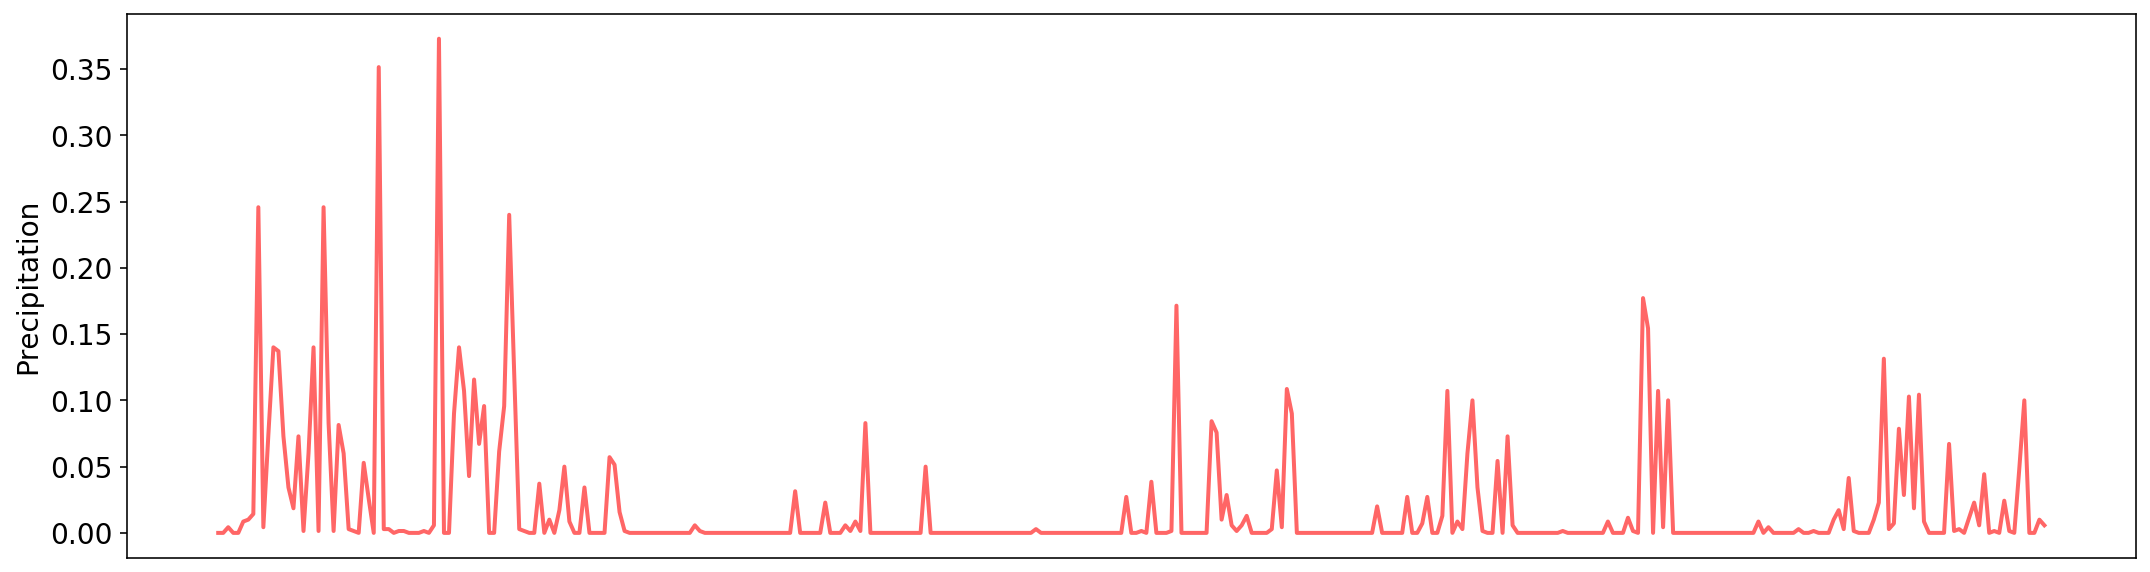

In [25]:
fig, ax1 = plt.subplots(1, 1,figsize=(18,5))

ax1.plot(scrubland_precip_daily_mean,color='red',linewidth=2,alpha=0.6)

ax1.set_ylabel('Precipitation',size=14)
ax1.tick_params(bottom=False,labelbottom=False,labelsize=14)    


plt.show()

## `Pine-oak`

2010 --> 2018

In [26]:
pineoak_precip = pd.read_csv("precipitation/James_Reserve_Daily_Precipitation.csv")
pineoak_precip

,Date,Year,Day of Year,Day of Run,Total Precipitation
0,1/1/10,2010,1,1,0.0
1,1/2/10,2010,2,2,0.0
2,1/3/10,2010,3,3,0.0
3,1/4/10,2010,4,4,0.0
4,1/5/10,2010,5,5,0.0
...,...,...,...,...,...
3282,12/27/18,2018,361,3283,0.0
3283,12/28/18,2018,362,3284,-9999.0
3284,12/29/18,2018,363,3285,-9999.0
3285,12/30/18,2018,364,3286,-9999.0


In [27]:
pineoak_precip.isnull().values.any()

False

In [28]:
pineoak_precip[pineoak_precip['Total Precipitation'] < 0.0]

,Date,Year,Day of Year,Day of Run,Total Precipitation
1136,2/10/13,2013,41,1137,-9999.0
1137,2/11/13,2013,42,1138,-9999.0
1138,2/12/13,2013,43,1139,-9999.0
1139,2/13/13,2013,44,1140,-9999.0
1140,2/14/13,2013,45,1141,-9999.0
1834,1/9/15,2015,9,1835,-9999.0
1835,1/10/15,2015,10,1836,-9999.0
1836,1/11/15,2015,11,1837,-9999.0
2945,1/24/18,2018,24,2946,-9999.0
3129,7/27/18,2018,208,3130,-9999.0


In [29]:
pineoak_precip_cor = pineoak_precip.copy()
pineoak_precip_cor['Total Precipitation'].loc[pineoak_precip['Total Precipitation'] < 0.0] = 0.0
pineoak_precip_cor

/Users/Ben/DEMENTpy/dement_env/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Date,Year,Day of Year,Day of Run,Total Precipitation
0,1/1/10,2010,1,1,0.0
1,1/2/10,2010,2,2,0.0
2,1/3/10,2010,3,3,0.0
3,1/4/10,2010,4,4,0.0
4,1/5/10,2010,5,5,0.0
...,...,...,...,...,...
3282,12/27/18,2018,361,3283,0.0
3283,12/28/18,2018,362,3284,0.0
3284,12/29/18,2018,363,3285,0.0
3285,12/30/18,2018,364,3286,0.0


In [30]:
pineoak_precip_comb = \
pd.concat([pineoak_precip_cor[pineoak_precip_cor['Year']==2010]['Total Precipitation'].reset_index(drop=True),
           pineoak_precip_cor[pineoak_precip_cor['Year']==2011]['Total Precipitation'].reset_index(drop=True),
           pineoak_precip_cor[pineoak_precip_cor['Year']==2013]['Total Precipitation'].reset_index(drop=True),
           pineoak_precip_cor[pineoak_precip_cor['Year']==2014]['Total Precipitation'].reset_index(drop=True),
           pineoak_precip_cor[pineoak_precip_cor['Year']==2015]['Total Precipitation'].reset_index(drop=True),
           pineoak_precip_cor[pineoak_precip_cor['Year']==2017]['Total Precipitation'].reset_index(drop=True),
           pineoak_precip_cor[pineoak_precip_cor['Year']==2018]['Total Precipitation'].reset_index(drop=True)
          ],axis=1,ignore_index=True,sort=False)
pineoak_precip_comb

,0,1,2,3,4,5,6
0,0.00,0.00,0.0,0.00,0.01,0.02,0.0
1,0.00,0.30,0.0,0.00,0.00,0.00,0.0
2,0.00,0.48,0.0,0.00,0.00,0.00,0.0
3,0.00,0.00,0.0,0.00,0.00,0.00,0.0
4,0.00,0.00,0.0,0.00,0.00,0.43,0.0
...,...,...,...,...,...,...,...
360,0.00,0.00,0.0,0.00,0.00,0.00,0.0
361,0.00,0.00,0.0,0.00,0.34,0.00,0.0
362,1.68,0.00,0.0,0.00,0.00,0.00,0.0
363,0.00,0.00,0.0,0.49,0.00,0.00,0.0


In [31]:
pineoak_precip_daily_mean = pineoak_precip_comb.mean(axis=1)
pineoak_precip_daily_mean

0      0.004286
1      0.042857
2      0.068571
3      0.000000
4      0.061429
         ...   
360    0.000000
361    0.048571
362    0.240000
363    0.070000
364    0.004286
Length: 365, dtype: float64

In [32]:
sum(pineoak_precip_daily_mean)

41.527142857142856

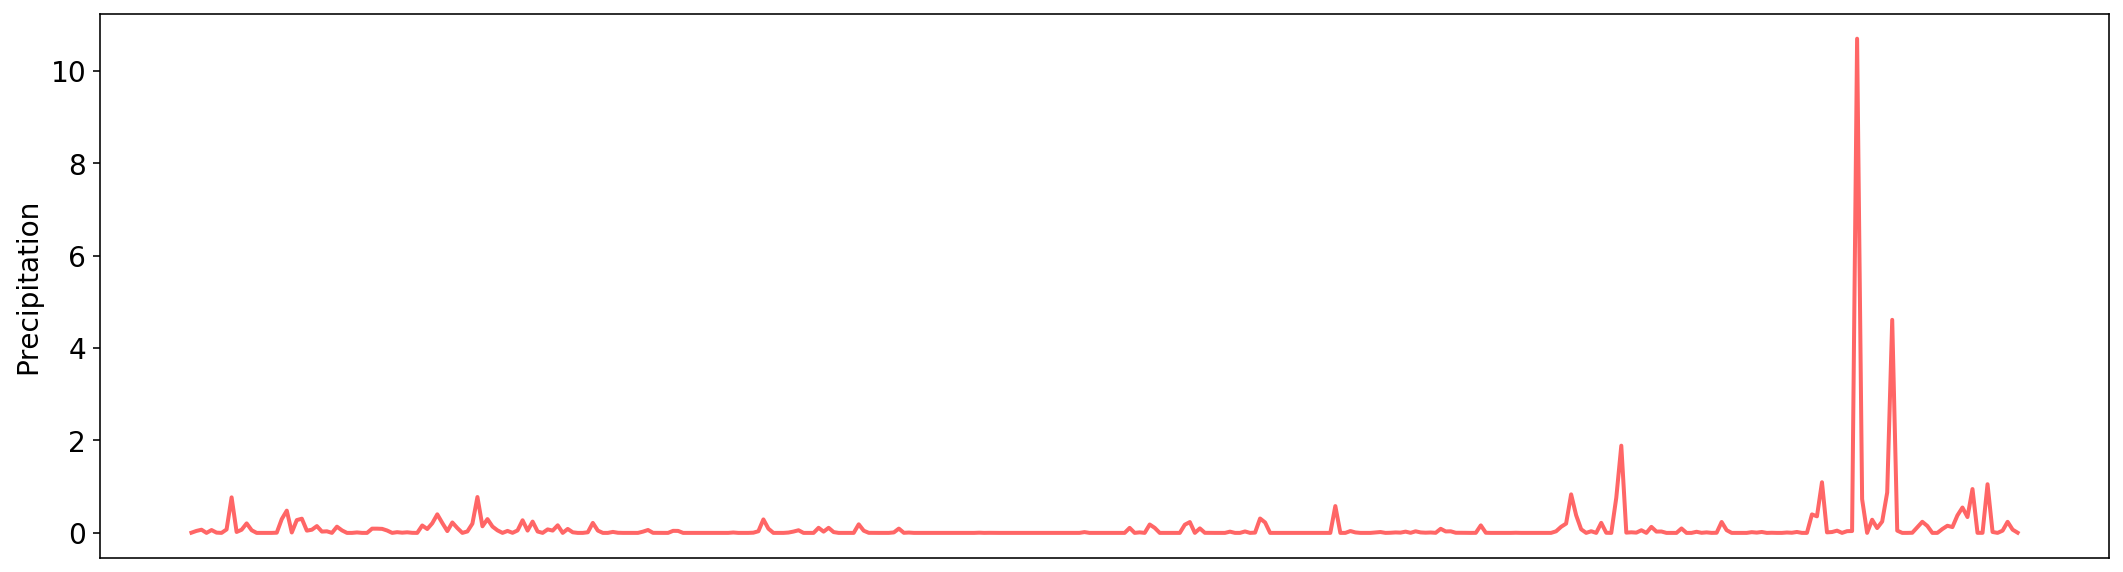

In [33]:
fig, ax1 = plt.subplots(1, 1,figsize=(18,5))

ax1.plot(pineoak_precip_daily_mean,color='red',linewidth=2,alpha=0.6)

ax1.set_ylabel('Precipitation',size=14)
ax1.tick_params(bottom=False,labelbottom=False,labelsize=14)    


plt.show()

## `Subalpine`

2009 --> 2019

In [34]:
subalpine_precip = pd.read_csv("precipitation/MtSanJacinoto_Daily_Precipitation.csv")
subalpine_precip

,Date,Year,Day of Year,Day of Run,Total Precipitation
0,1/1/09,2009,1,1,0.00
1,1/2/09,2009,2,2,0.00
2,1/3/09,2009,3,3,0.00
3,1/4/09,2009,4,4,0.12
4,1/5/09,2009,5,5,0.00
...,...,...,...,...,...
4012,12/27/19,2019,361,4013,0.29
4013,12/28/19,2019,362,4014,0.04
4014,12/29/19,2019,363,4015,0.00
4015,12/30/19,2019,364,4016,0.00


In [35]:
subalpine_precip.isnull().values.any()

False

In [36]:
subalpine_precip[subalpine_precip['Total Precipitation'] < 0.0]

,Date,Year,Day of Year,Day of Run,Total Precipitation


In [37]:
subalpine_precip_comb = \
pd.concat([subalpine_precip[subalpine_precip['Year']==2009]['Total Precipitation'].reset_index(drop=True),
           subalpine_precip[subalpine_precip['Year']==2010]['Total Precipitation'].reset_index(drop=True),
           subalpine_precip[subalpine_precip['Year']==2011]['Total Precipitation'].reset_index(drop=True),
           subalpine_precip[subalpine_precip['Year']==2013]['Total Precipitation'].reset_index(drop=True),
           subalpine_precip[subalpine_precip['Year']==2014]['Total Precipitation'].reset_index(drop=True),
           subalpine_precip[subalpine_precip['Year']==2015]['Total Precipitation'].reset_index(drop=True),
           subalpine_precip[subalpine_precip['Year']==2017]['Total Precipitation'].reset_index(drop=True),
           subalpine_precip[subalpine_precip['Year']==2018]['Total Precipitation'].reset_index(drop=True),
           subalpine_precip[subalpine_precip['Year']==2019]['Total Precipitation'].reset_index(drop=True),
          ],axis=1,ignore_index=True,sort=False)
subalpine_precip_comb

,0,1,2,3,4,5,6,7,8
0,0.00,0.00,0.00,0.0,0.00,0.28,0.28,0.0,0.02
1,0.00,0.00,0.00,0.0,0.00,0.14,0.00,0.0,0.10
2,0.00,0.00,0.32,0.0,0.00,0.00,0.00,0.0,0.01
3,0.12,0.00,0.15,0.0,0.00,0.00,0.00,0.0,0.00
4,0.00,0.00,0.00,0.0,0.00,0.00,0.11,0.0,0.00
...,...,...,...,...,...,...,...,...,...
360,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.29
361,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.04
362,0.00,0.02,0.00,0.0,0.00,0.08,0.00,0.0,0.00
363,0.00,0.04,0.00,0.0,0.00,0.00,0.00,0.0,0.00


In [38]:
subalpine_precip_daily_mean = subalpine_precip_comb.mean(axis=1)
subalpine_precip_daily_mean

0      0.064444
1      0.026667
2      0.036667
3      0.030000
4      0.012222
         ...   
360    0.032222
361    0.004444
362    0.011111
363    0.004444
364    0.051111
Length: 365, dtype: float64

In [39]:
sum(subalpine_precip_daily_mean)

12.626666666666674

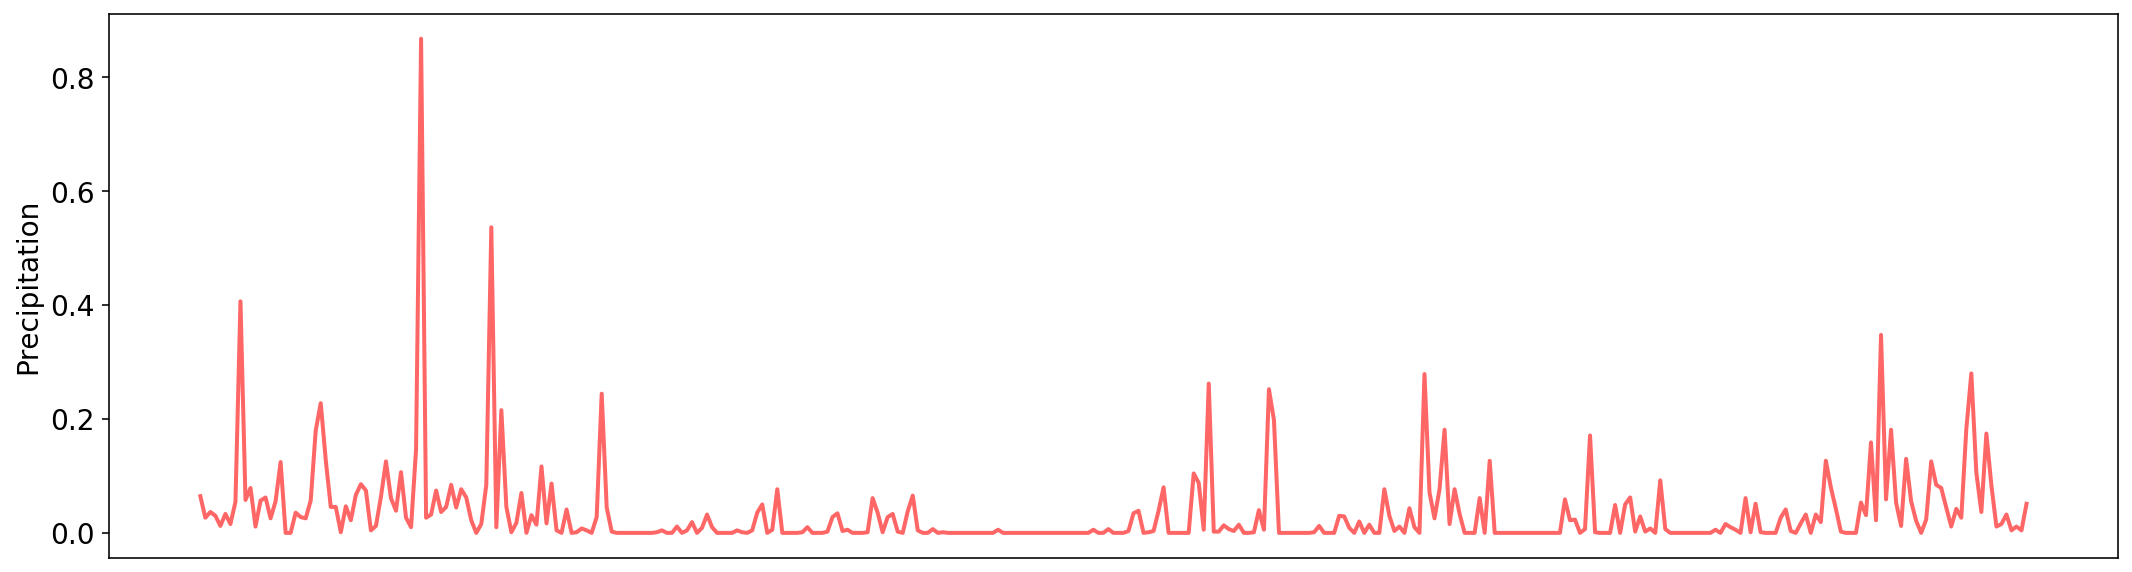

In [40]:
fig, ax1 = plt.subplots(1, 1,figsize=(18,5))

ax1.plot(subalpine_precip_daily_mean,color='red',linewidth=2,alpha=0.6)

ax1.set_ylabel('Precipitation',size=14)
ax1.tick_params(bottom=False,labelbottom=False,labelsize=14)    


plt.show()

#### Subalpine site with NOAA data

In [41]:
subalpine_precip1 = pd.read_csv('precipitation/2263106.csv')
subalpine_precip1

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES
0,US1CARV0002,"IDYLLWILD 1.8 NW, CA US",33.763056,-116.7350,1927.9,2009-01-01,0.00,",,N",0.0,",,N"
1,US1CARV0002,"IDYLLWILD 1.8 NW, CA US",33.763056,-116.7350,1927.9,2009-01-02,0.00,",,N",0.0,",,N"
2,US1CARV0002,"IDYLLWILD 1.8 NW, CA US",33.763056,-116.7350,1927.9,2009-01-03,0.00,",,N",0.0,",,N"
3,US1CARV0002,"IDYLLWILD 1.8 NW, CA US",33.763056,-116.7350,1927.9,2009-01-04,0.01,",,N",NaN,NaN
4,US1CARV0002,"IDYLLWILD 1.8 NW, CA US",33.763056,-116.7350,1927.9,2009-01-05,0.00,",,N",0.0,",,N"
...,...,...,...,...,...,...,...,...,...,...
7158,USC00044211,"IDYLLWILD FIRE DEPARTMENT, CA US",33.757200,-116.7066,1639.8,2019-12-27,0.00,",,7,1600",0.0,",,7"
7159,USC00044211,"IDYLLWILD FIRE DEPARTMENT, CA US",33.757200,-116.7066,1639.8,2019-12-28,0.00,",,7,1600",0.0,",,7"
7160,USC00044211,"IDYLLWILD FIRE DEPARTMENT, CA US",33.757200,-116.7066,1639.8,2019-12-29,0.00,",,7,1600",0.0,",,7"
7161,USC00044211,"IDYLLWILD FIRE DEPARTMENT, CA US",33.757200,-116.7066,1639.8,2019-12-30,0.00,",,7,1600",0.0,",,7"


In [42]:
US1CARV0002 = subalpine_precip1[subalpine_precip1['STATION']=='US1CARV0002']
USC00044211 = subalpine_precip1[subalpine_precip1['STATION']=='USC00044211']

In [43]:
USC00044211

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES
3192,USC00044211,"IDYLLWILD FIRE DEPARTMENT, CA US",33.7572,-116.7066,1639.8,2009-01-01,0.00,",,0,1600",0.0,",,0"
3193,USC00044211,"IDYLLWILD FIRE DEPARTMENT, CA US",33.7572,-116.7066,1639.8,2009-01-02,0.00,",,0,1600",0.0,",,0"
3194,USC00044211,"IDYLLWILD FIRE DEPARTMENT, CA US",33.7572,-116.7066,1639.8,2009-01-03,0.00,",,0,1600",0.0,",,0"
3195,USC00044211,"IDYLLWILD FIRE DEPARTMENT, CA US",33.7572,-116.7066,1639.8,2009-01-04,0.00,",,0,1600",0.0,"P,,0"
3196,USC00044211,"IDYLLWILD FIRE DEPARTMENT, CA US",33.7572,-116.7066,1639.8,2009-01-05,0.00,",,0,1600",0.0,",,0"
...,...,...,...,...,...,...,...,...,...,...
7158,USC00044211,"IDYLLWILD FIRE DEPARTMENT, CA US",33.7572,-116.7066,1639.8,2019-12-27,0.00,",,7,1600",0.0,",,7"
7159,USC00044211,"IDYLLWILD FIRE DEPARTMENT, CA US",33.7572,-116.7066,1639.8,2019-12-28,0.00,",,7,1600",0.0,",,7"
7160,USC00044211,"IDYLLWILD FIRE DEPARTMENT, CA US",33.7572,-116.7066,1639.8,2019-12-29,0.00,",,7,1600",0.0,",,7"
7161,USC00044211,"IDYLLWILD FIRE DEPARTMENT, CA US",33.7572,-116.7066,1639.8,2019-12-30,0.00,",,7,1600",0.0,",,7"


## Water potential ($\psi$) of the Grassland site at Loma Ridge, CA

derived from measured fuel moisture (Allison and Goulden 2017 SBB)

In [5]:
grassland = pd.read_csv('precipitation/grassland_water_potential.csv', index_col=0)
grassland.head()

,Temp,FM,Psi,Date
0,10.823177,51.092615,-0.699744,2010-12-15
1,11.276333,59.277813,-0.590705,2010-12-16
2,9.696135,65.896792,-0.523555,2010-12-17
3,12.626583,69.708313,-0.491047,2010-12-18
4,12.442771,70.763521,-0.482708,2010-12-19


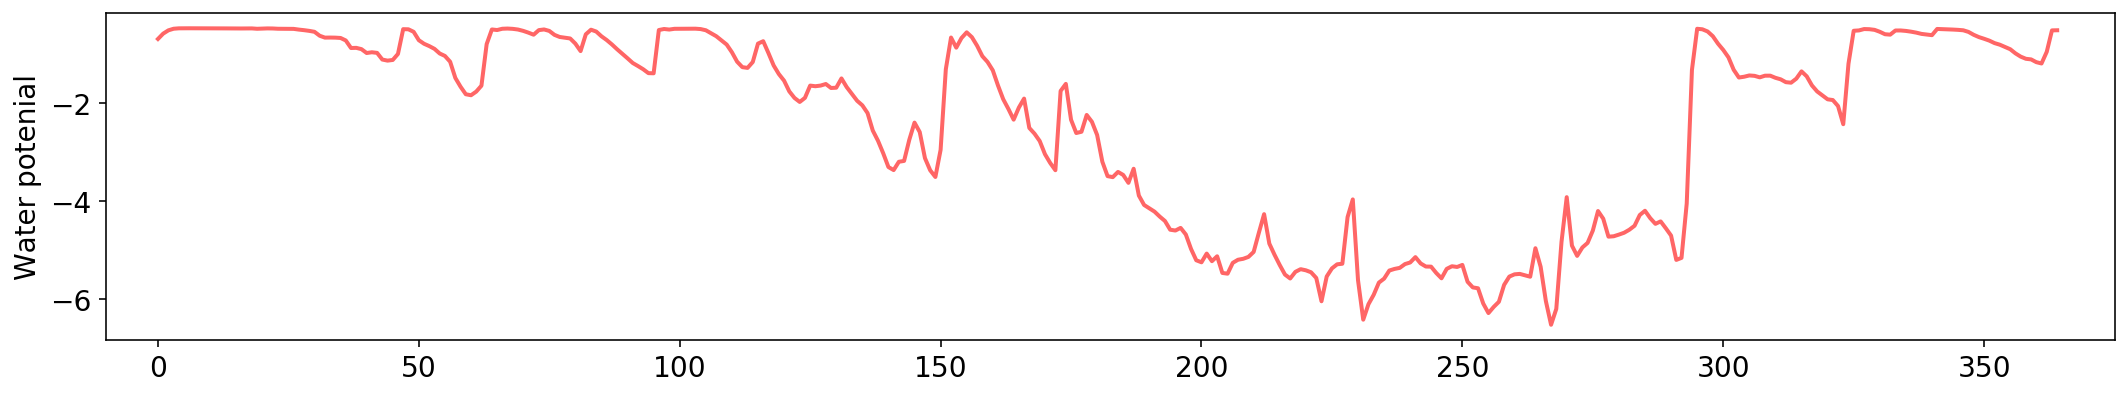

In [6]:
grassland_psi = grassland['Psi'][0:365]

fig, ax1 = plt.subplots(1, 1,figsize=(18,3))
ax1.plot(grassland_psi,color='red',linewidth=2,alpha=0.6)
ax1.set_ylabel('Water potenial',size=14)
ax1.set_xlim(-10,365*1+10)
ax1.tick_params(bottom=True,labelbottom=True,labelsize=14)
plt.show()

## Derive $\psi$ for each of the other four sites

by LINEARLY scaling the grassland site $\psi$ with **Total Annual Precipitation ($TAP$)** at each site.

**NOTE**: applied only to the DRY SEASON, assuming the same $\psi$ in the WET season across the gradient.

start of dry season: 108 | end of dry season: 290

In [7]:
## AS PER Glassman et al. 2019, PNAS
TAP = pd.Series(data=[213.5, 428.4, 569.4, 1415.8, 1376.5],index=['desert', 'scrubland', 'grassland', 'pineoak', 'subalpine'])
TAP

desert        213.5
scrubland     428.4
grassland     569.4
pineoak      1415.8
subalpine    1376.5
dtype: float64

In [8]:
scaling_factor = TAP.grassland/TAP
scaling_factor

desert       2.666979
scrubland    1.329132
grassland    1.000000
pineoak      0.402175
subalpine    0.413658
dtype: float64

## Desert $\psi$

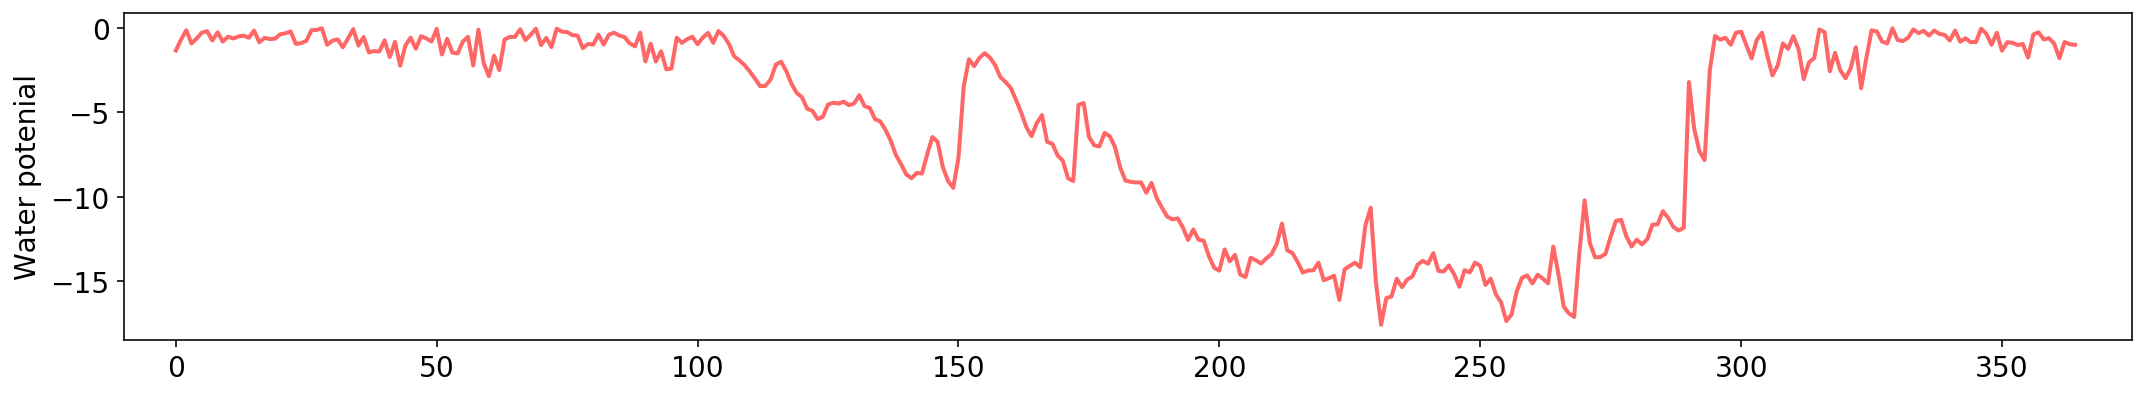

In [63]:
#vectorize scaling factor distinguished between dry and wet season
scaling_factor_vector = [scaling_factor.desert]*365
for index, item in enumerate(scaling_factor_vector):
    if (index < 107) | (index > 289):
        scaling_factor_vector[index] = 1.0
        if index%1 == 0:
            scaling_factor_vector[index] = 1.0 + np.ndarray.item(np.random.uniform(-0.999,1.0,1))
    else:
        scaling_factor_vector[index] += np.ndarray.item(np.random.uniform(-0.1,0.1,1))
#data derived        
desert_psi = grassland['Psi'][0:365]*scaling_factor_vector
#visualization
fig, ax1 = plt.subplots(1, 1,figsize=(18,3))
ax1.plot(desert_psi,color='red',linewidth=2,alpha=0.6)
ax1.set_ylabel('Water potenial',size=14)
ax1.set_xlim(-10,365*1+10)
ax1.tick_params(bottom=True,labelbottom=True,labelsize=14)
plt.show()

## Scrubland $\psi$

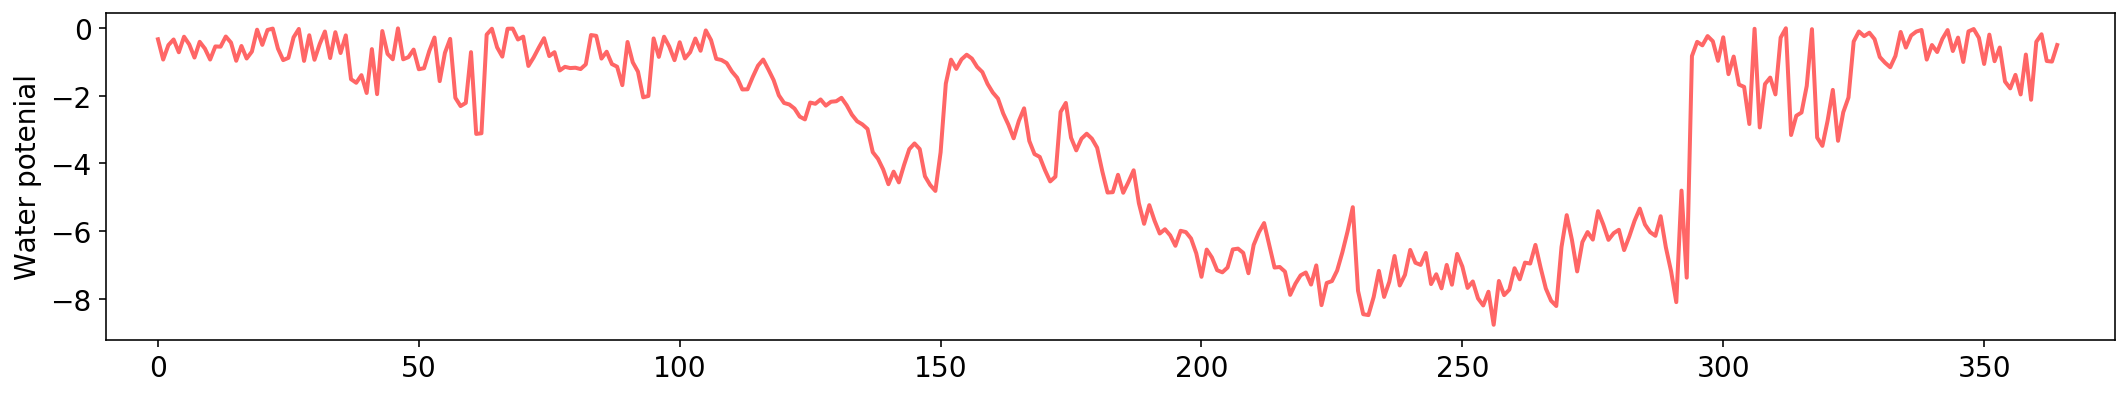

In [64]:
#vectorize scaling factor distinguishing between dry and wet season
scaling_factor_vector = [scaling_factor.scrubland]*365
for index, item in enumerate(scaling_factor_vector):
    if (index < 107) | (index > 289):
        scaling_factor_vector[index] = 1.0
        if index%1 == 0:
            scaling_factor_vector[index] = 1.0 + np.ndarray.item(np.random.uniform(-0.999,1.0,1))
    else:
        scaling_factor_vector[index] += np.ndarray.item(np.random.uniform(-0.1,0.1,1))
#data derived        
scrubland_psi = grassland['Psi'][0:365]*scaling_factor_vector
#visualization
fig, ax1 = plt.subplots(1, 1,figsize=(18,3))
ax1.plot(scrubland_psi,color='red',linewidth=2,alpha=0.6)
ax1.set_ylabel('Water potenial',size=14)
ax1.set_xlim(-10,365*1+10)
ax1.tick_params(bottom=True,labelbottom=True,labelsize=14)
plt.show()

## Pine-oak $\psi$

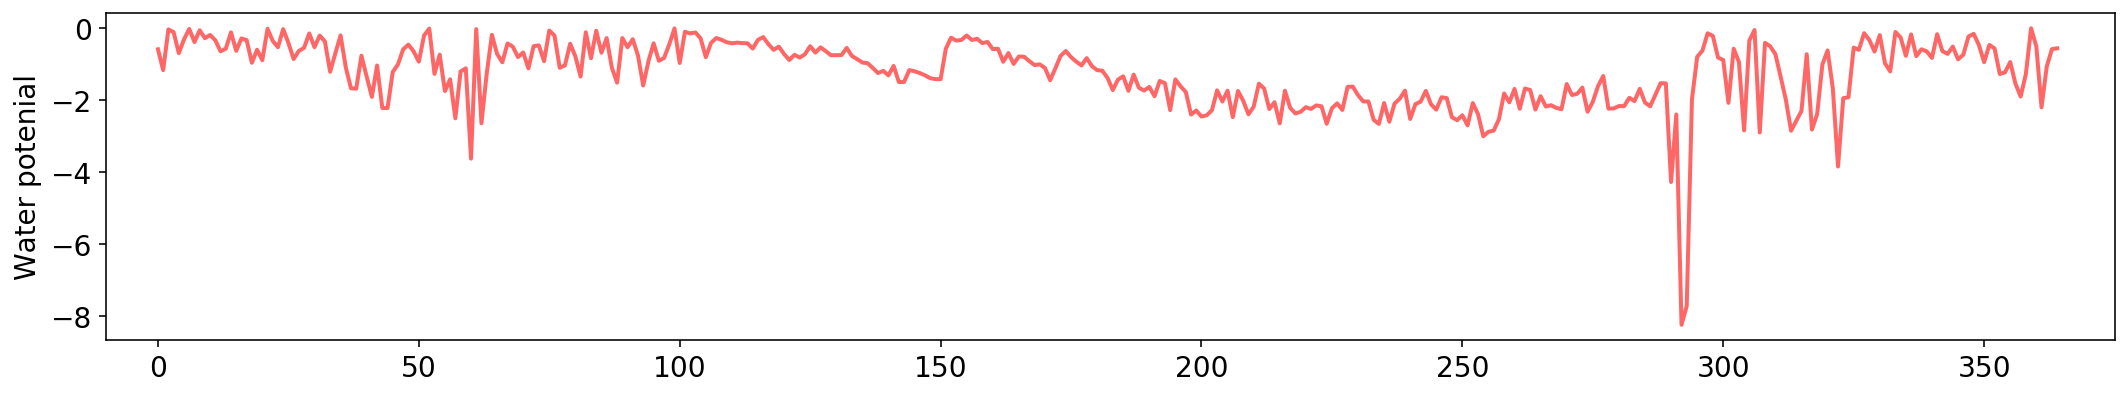

In [65]:
#vectorize scaling factor distinguishing between dry and wet season
scaling_factor_vector = [scaling_factor.pineoak]*365
for index, item in enumerate(scaling_factor_vector):
    if (index < 107) | (index > 289):
        scaling_factor_vector[index] = 1.0
        if index%1 == 0:
            scaling_factor_vector[index] = 1.0 + np.ndarray.item(np.random.uniform(-0.999,1.0,1))
    else:
        scaling_factor_vector[index] += np.ndarray.item(np.random.uniform(-0.1,0.1,1))
#data derived        
pineoak_psi = grassland['Psi'][0:365]*scaling_factor_vector
#visualization
fig, ax1 = plt.subplots(1, 1,figsize=(18,3))
ax1.plot(pineoak_psi,color='red',linewidth=2,alpha=0.6)
ax1.set_ylabel('Water potenial',size=14)
ax1.set_xlim(-10,365*1+10)
ax1.tick_params(bottom=True,labelbottom=True,labelsize=14)
plt.show()

## Subalpine $\psi$

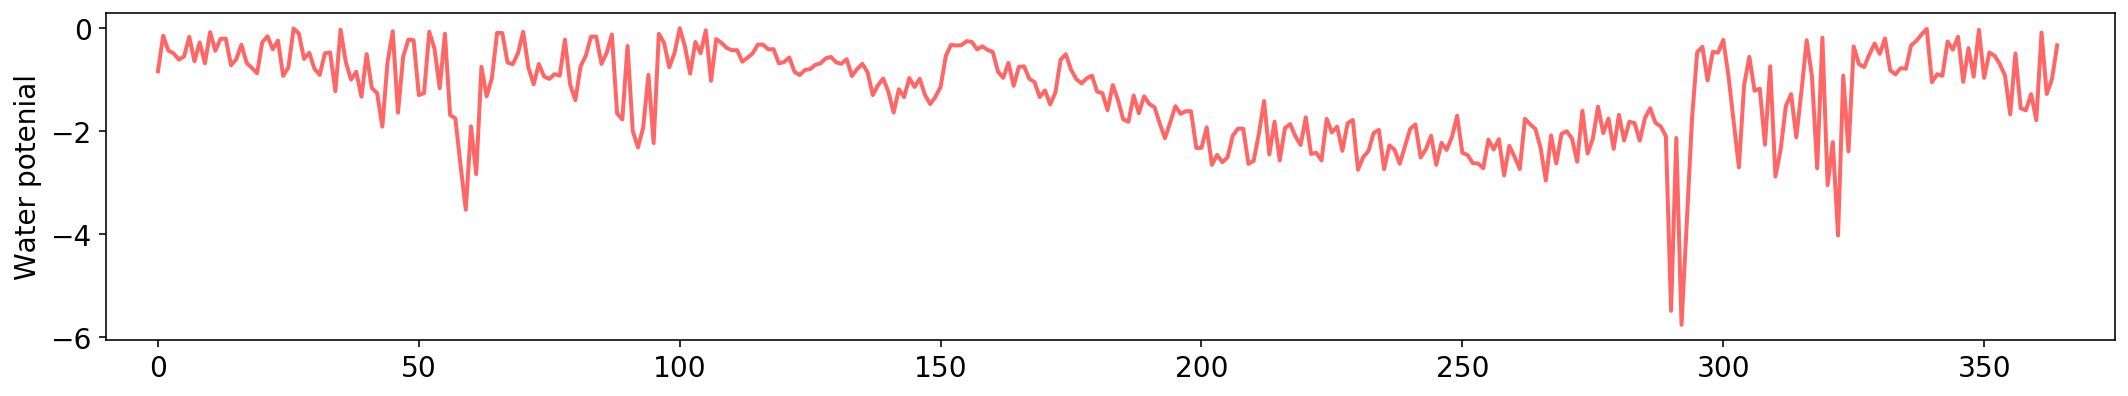

In [66]:
#vectorize scaling factor distinguishing between dry and wet season
scaling_factor_vector = [scaling_factor.subalpine]*365
for index, item in enumerate(scaling_factor_vector):
    if (index < 107) | (index > 289):
        scaling_factor_vector[index] = 1.0
        if index%1 == 0:
            scaling_factor_vector[index] = 1.0 + np.ndarray.item(np.random.uniform(-0.999,1.0,1))
    else:
        scaling_factor_vector[index] += np.ndarray.item(np.random.uniform(-0.1,0.1,1))
#data derived        
subalpine_psi = grassland['Psi'][0:365]*scaling_factor_vector
#visualization
fig, ax1 = plt.subplots(1, 1,figsize=(18,3))
ax1.plot(subalpine_psi,color='red',linewidth=2,alpha=0.6)
ax1.set_ylabel('Water potenial',size=14)
ax1.set_xlim(-10,365*1+10)
ax1.tick_params(bottom=True,labelbottom=True,labelsize=14)
plt.show()

## Concatenate the 5 sites

In [67]:
gradient_psi = pd.concat([desert_psi,scrubland_psi,grassland_psi,pineoak_psi,subalpine_psi],
                         axis=1,ignore_index=False,sort=False)
gradient_psi.columns=['desert', 'scrubland', 'grassland', 'pineoak', 'subalpine']
gradient_psi

,desert,scrubland,grassland,pineoak,subalpine
0,-1.331183,-0.336538,-0.699744,-0.590270,-0.838028
1,-0.686744,-0.934717,-0.590705,-1.169667,-0.145873
2,-0.133402,-0.508875,-0.523555,-0.035452,-0.436650
3,-0.913516,-0.342200,-0.491047,-0.113235,-0.489473
4,-0.618849,-0.719718,-0.482708,-0.696430,-0.610713
...,...,...,...,...,...
360,-0.923626,-0.410936,-1.172517,-0.508902,-1.786998
361,-1.792035,-0.188698,-1.199443,-2.204374,-0.086317
362,-0.827197,-0.977458,-0.962021,-1.070581,-1.279670
363,-0.961106,-0.994794,-0.524392,-0.584423,-0.991498


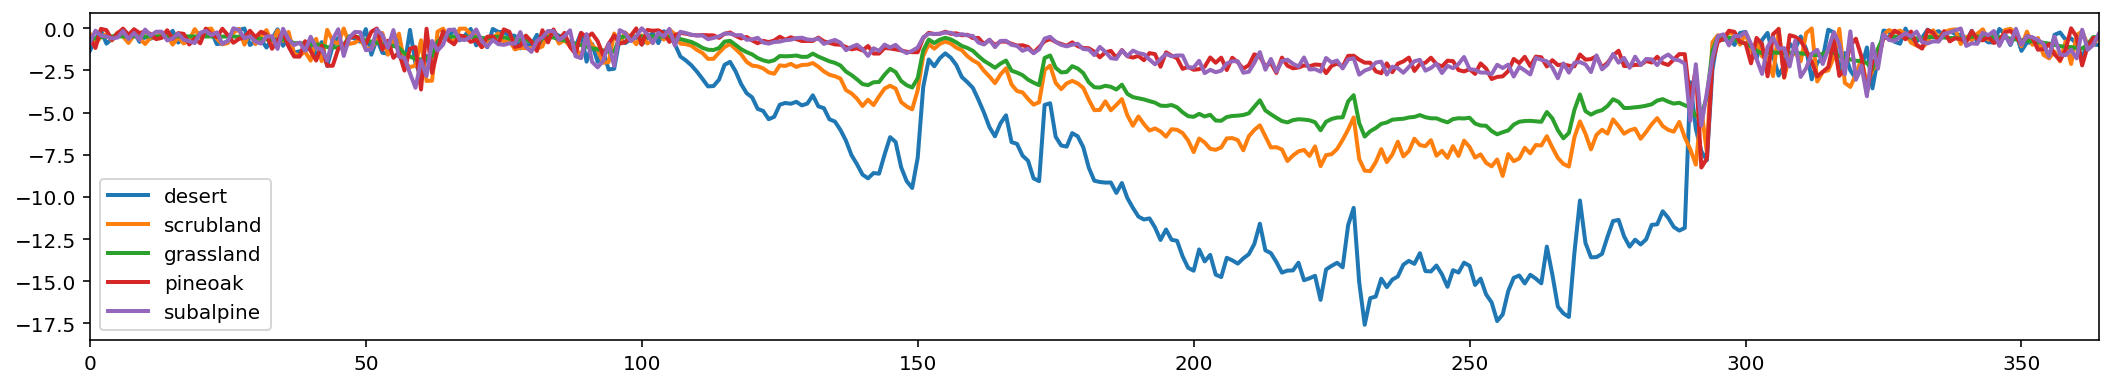

In [70]:
gradient_psi.plot(figsize=(18,3),linewidth=2)
plt.show()

In [69]:
gradient_psi.to_csv('precipitation/gradient_psi.csv')